In [ ]:
# 1. What is Boosting in Machine Learning? Explain how it improves weak learners.
"""
Boosting is an ensemble learning technique that combines multiple weak learners (usually shallow decision trees) sequentially to form a strong, accurate model.
Each new learner focuses on the errors made by previous models, giving more weight to misclassified samples so that the model gradually improves.
By sequentially reducing bias and focusing on hard-to-predict cases, boosting turns weak learners into a strong predictive model, improving both accuracy and generalization.
"""

In [ ]:
# 2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
"""
AdaBoost adjusts the weights of misclassified samples — each new model focuses more on the data points that previous models 
got wrong. It combines weak learners by giving them weights based on their accuracy.
Gradient Boosting, on the other hand, trains new models to minimize the residual errors (difference between actual and 
predicted values) using gradient descent. Instead of adjusting sample weights, it fits the next model to the negative 
gradient of the loss function.
"""

In [ ]:
# 3. How does regularization help in XGBoost?
"""
Regularization in XGBoost helps prevent overfitting by controlling the model’s complexity. It adds penalty terms to the loss 
function that discourage overly complex trees.
"""

In [ ]:
# 4. Why is CatBoost considered efficient for handling categorical data?
"""
CatBoost is efficient for handling categorical data because it uses ordered target encoding and combinations of categorical 
features internally, eliminating the need for manual preprocessing like one-hot encoding.
It converts categorical values into numerical form based on the statistics of target values, while carefully avoiding data 
leakage by using ordered boosting
"""

In [ ]:
# 5. What are some real-world applications where boosting techniques are preferred over bagging methods?
"""
Boosting techniques are preferred over bagging methods in applications where high predictive accuracy and handling of complex patterns are required. Some real-world examples include:
Credit risk prediction – Detecting potential loan defaulters.
Fraud detection – Identifying rare fraudulent transactions.
Customer churn prediction – Finding customers likely to leave a service.
Click-through rate prediction – In online advertising.
Medical diagnosis – Predicting disease likelihood from patient data.
"""

In [1]:
# 6. Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


C:\Users\aditi\anaconda3\py\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aditi\anaconda3\py\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\aditi\anaconda3\py\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


AdaBoost Classifier Accuracy: 0.9824561403508771


In [2]:
# 7. : Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.7803012822391022


In [3]:
# 8. Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))



Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.9590643274853801


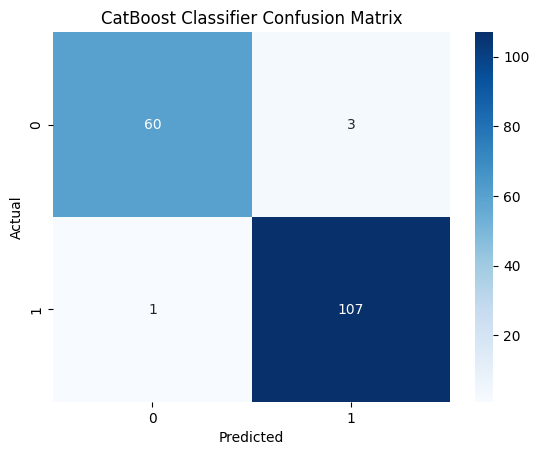

In [6]:
# 9. Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# 10. You're working for a FinTech company trying to predict loan default using
# customer demographics and transaction behavior.
# The dataset is imbalanced, contains missing values, and has both numeric and
# categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:
# ● Data preprocessing & handling missing/categorical values
# ● Choice between AdaBoost, XGBoost, or CatBoost
# ● Hyperparameter tuning strategy
# ● Evaluation metrics you'd choose and why
# ● How the business would benefit from your model
"""
1) Data preprocessing & handling missing / categorical values

Audit & split early

Do an initial EDA and then split train / holdout (time-based if data has temporal order) to avoid leakage.

Missing values

Numeric: median or iterative imputer (e.g., IterativeImputer) for important features.

Categorical: treat missing as its own category ("MISSING") or impute most-frequent if appropriate.

If using CatBoost, you can leave many missing values and let the model handle them.

    Categorical encoding
    
    CatBoost: feed raw categorical columns (no encoding).

    XGBoost / LightGBM: use target-smoothed encoding (leave-one-out or k-fold smoothing) for high-cardinality; one-hot for small-cardinality features. Avoid naive label encoding unless ordinal.

    Feature engineering

    Aggregate transaction history (counts, sums, recency, rolling means, variability), time features (days since last payment), credit-utilization ratios, behavioral flags.

    Create interaction features if domain-relevant.

    Imbalance handling (pre-model)

    Prefer model-side handling (class weights / scale_pos_weight), but consider controlled oversampling (SMOTE) only on training folds, not before CV.

    Data hygiene

    Remove leakage (future info), deduplicate customers, group splits by customer id if multiple rows per customer.

2) Choice between AdaBoost, XGBoost, or CatBoost

    CatBoost → best if you have many categorical features and want fast, low-prep workflow + ordered target encoding (avoids leakage).

    XGBoost / LightGBM → excellent if you prefer extensive tuning, speed, and large-scale training; use target encoding for cats.

    AdaBoost → generally less competitive on complex, imbalanced tabular financial data; skip unless you need a very simple baseline.
    Recommendation: start with CatBoost (quick win) and compare with a tuned XGBoost/LightGBM for final production model.

3) Hyperparameter tuning strategy

    Split strategy

    Use Stratified K-Fold CV (k=5) or time-based CV if temporal drift matters; group by customer if necessary.

    Search method

    RandomizedSearch or Bayesian optimization (Optuna/Hyperopt) for efficiency.

    Key hyperparameters to tune

    learning_rate (0.01–0.2), n_estimators (use large + early stopping), max_depth (3–10), subsample/bagging_fraction, colsample_bytree/rsm, min_child_weight / min_data_in_leaf, reg_alpha/reg_lambda.

    For CatBoost: depth, learning_rate, l2_leaf_reg, border_count, bagging_temperature.

    For class imbalance: tune scale_pos_weight (XGBoost) or class_weights (CatBoost parameter) or use objective='CrossEntropy' + class weights.

    Early stopping

    Use a validation fold with early_stopping_rounds to prevent overfitting.

    Optimization target

Optimize business metric (e.g., PR-AUC or expected monetary loss) rather than raw accuracy. Use custom scorer in Grid/Optuna if needed.

4) Evaluation metrics & why

    Primary discrimination metrics

    ROC-AUC — overall separability.

    PR-AUC (Precision-Recall AUC) — preferred for rare positives (defaults).

    Business-focused / threshold metrics

    Precision@k / Top-k recall — how many true defaulters are in the top X% you’d action (useful for manual review allocation).

    Recall / Specificity — depending on cost trade-offs.

    Probability quality

    Brier score and calibration curve (or Platt/Isotonic calibration) — critical if decisions use predicted probabilities (pricing, provisioning).

    Cost-sensitive metric

    Compute expected loss / profit using business cost matrix (FP cost vs FN cost) — use this to pick decision threshold.

    Validation strategy

    Report mean + std across CV folds and validate on an out-of-time holdout.

5) How business benefits

    Better risk ranking → more accurate identification of high-risk applicants, reducing default losses and improving provisioning.

    Resource efficiency → focus manual underwriting or collections on top-k risky accounts, lowering operational cost.

    Optimized pricing & acceptance → use calibrated probabilities for risk-based pricing and cutoffs, improving portfolio profitability.

    Regulatory & audit readiness → explainability tools (SHAP, feature importances) make decisions auditable.

    Robustness → ensembles (boosting) reduce bias and capture complex patterns in transaction behavior, improving stability over single models.
    """